# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Adam Firmansyah]
- **Email:** [adamfirmansyah0802@gmail.com]
- **ID Dicoding:** [MC009D5Y0435]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memiliki penjualan tertinggi?
- Apakah ada kategori produk dengan tingkat pengembalian yang tinggi?
- Apakah ada hubungan antara waktu pengiriman dan rating produk?

## Import Semua Packages/Library yang Digunakan

In [138]:
# Library untuk analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns


In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [140]:
# customers_dataset
customers_df = pd.read_csv('/content/drive/MyDrive/data/customers_dataset.csv', delimiter=",")

# geolocation_dataset
geolocation_df = pd.read_csv('/content/drive/MyDrive/data/geolocation_dataset.csv', delimiter=",")

# order_items_dataset
order_items_df = pd.read_csv('/content/drive/MyDrive/data/order_items_dataset.csv', delimiter=",")

# order_payments_dataset
order_payments_df = pd.read_csv('/content/drive/MyDrive/data/order_payments_dataset.csv', delimiter=",")

# order_reviews_dataset
order_reviews_df = pd.read_csv('/content/drive/MyDrive/data/order_reviews_dataset.csv', delimiter=",")

# orders_dataset
orders_df = pd.read_csv('/content/drive/MyDrive/data/orders_dataset.csv', delimiter=",")

# product_category_name_translation
product_category_df = pd.read_csv('/content/drive/MyDrive/data/product_category_name_translation.csv', delimiter=",")

# products_dataset
products_df = pd.read_csv('/content/drive/MyDrive/data/products_dataset.csv', delimiter=",")

# sellers_dataset
sellers_df = pd.read_csv('/content/drive/MyDrive/data/sellers_dataset.csv', delimiter=",")

In [141]:
#menampilkan beberapa baris pertama dari customer_df
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [142]:
#menampilkan beberapa baris pertama dari geolocation_df
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [143]:
#menampilkan beberapa baris pertama dari order_items_df
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [144]:
#menampilkan beberapa baris pertama dari order_payment_df
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [145]:
#menampilkan beberapa baris pertama dari order_reviews_df
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [146]:
#menampilkan beberapa baris pertama dari orders_df
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [147]:
#menampilkan beberapa baris pertama dari product_category_name_translation_df
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [148]:
#menampilkan beberapa baris pertama dari products_df
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [149]:
#menampilkan beberapa baris pertama dari sellers_df
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- customers_dataset -> berisi informasi tentang data pelanggan
- geolocation_dataset -> berisi informasi tentang letak geografis di tiap lokasi
- order_items_dataset -> berisi informasi tentang pesanan pelanggan, produk yang dibeli, penjual, harga produk, dan biaya pengiriman
- order_payments_dataset -> berisi informasi tentang pembayaran, seperti metode pembayaran dan total pembayaran
- order_reviews_dataset -> berisi informasi tentang review produk dari pelanggan seperti skor dan komentar
- orders_dataset -> berisi informasi tentang pesanan, seperti status pesanan, tanggal pembelian, estimasi tiba
- product_category_name_translation -> berisi informasi terjemahan kategori produk
- products_dataset -> berisi informasi tentang produk, seperti nama produk, deskripsi ukuran dan berat produk
- sellers_dataset -> berisi informasi tentang penjual






### Assessing Data

- Menilai Data

In [150]:
# Menilai Data
dfs = {
    "customers_df": customers_df,
    "geolocation_df": geolocation_df,
    "order_items_df": order_items_df,
    "order_payments_df": order_payments_df,
    "order_reviews_df": order_reviews_df,
    "orders_df": orders_df,
    "product_category_df": product_category_df,
    "products_df": products_df,
    "sellers_df": sellers_df
}

for name, df in dfs.items():
    print(f"=== {name} ===")
    print(df.info())
    print("\n")


=== customers_df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


=== geolocation_df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 

- Memeriksa informasi terkait jumlah missing values

In [151]:
# Memeriksa informasi terkait jumlah missing values
dfs = {
    "customers_df": customers_df,
    "geolocation_df": geolocation_df,
    "order_items_df": order_items_df,
    "order_payments_df": order_payments_df,
    "order_reviews_df": order_reviews_df,
    "orders_df": orders_df,
    "product_category_df": product_category_df,
    "products_df": products_df,
    "sellers_df": sellers_df
}

for name, df in dfs.items():
    print(f"=== Missing Values in {name} ===")
    print(df.isnull().sum())
    print("\n")


=== Missing Values in customers_df ===
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


=== Missing Values in geolocation_df ===
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


=== Missing Values in order_items_df ===
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


=== Missing Values in order_payments_df ===
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


=== Missing Values in order_reviews_df ===
review_id                      0
order_id                       0
review_score                   0
review_commen

- Memeriksa data duplikat

In [152]:
# Memeriksa data duplikat
dfs = {
    "customers_df": customers_df,
    "geolocation_df": geolocation_df,
    "order_items_df": order_items_df,
    "order_payments_df": order_payments_df,
    "order_reviews_df": order_reviews_df,
    "orders_df": orders_df,
    "product_category_df": product_category_df,
    "products_df": products_df,
    "sellers_df": sellers_df
}
for name, df in dfs.items():
    print(f"Jumlah duplikasi in {name} :", df.duplicated().sum())

Jumlah duplikasi in customers_df : 0
Jumlah duplikasi in geolocation_df : 261831
Jumlah duplikasi in order_items_df : 0
Jumlah duplikasi in order_payments_df : 0
Jumlah duplikasi in order_reviews_df : 0
Jumlah duplikasi in orders_df : 0
Jumlah duplikasi in product_category_df : 0
Jumlah duplikasi in products_df : 0
Jumlah duplikasi in sellers_df : 0


- menampilkan ringkasan parameter statistik

In [153]:
# menampilkan ringkasan parameter statistik
dfs = {
    "customers_df": customers_df,
    "geolocation_df": geolocation_df,
    "order_items_df": order_items_df,
    "order_payments_df": order_payments_df,
    "order_reviews_df": order_reviews_df,
    "orders_df": orders_df,
    "product_category_df": product_category_df,
    "products_df": products_df,
    "sellers_df": sellers_df
}

for name, df in dfs.items():
    print(f"=== Statistik Deskriptif untuk {name} ===")
    print(df.describe())
    print("\n")


=== Statistik Deskriptif untuk customers_df ===
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


=== Statistik Deskriptif untuk geolocation_df ===
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.21

**Insight:**
1. customers_df
   - tidak ada kesalahan pada data customers_df

2. geolocation_df
   - terdapat duplikasi data sebanyak 261.831 data

3. order_items_df
   - terdapat kesalahan tipe data pada field shipping_limit_date yang seharusnya adalah datetime

4. order_payments_df
   - tidak ada kesalahan pada data order_payments_df

5. order_reviews_df
   - terdapat missing value pada review_comment_title sebanyak 87.656 data dan pada review_comment_message sebanyak 58.247 data

6. orders_df
   - terdapat kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya datetime dan bukan objek
   - terdapat missing value pada order_approved_at sebanyak 160 data, order_delivered_carrier_date sebanyak 1.783 data, order_delivered_customer_date sebanyak 2.965 data

7. product_category_df
   - tidak ada kesalahan pada data

8. products_df
   - terdapat missing value sebanyak 610 data pada product_category_name, product_name_lenght,product_description_lenght, product_photos_qty
  - terdapat missing value sebanyak 2 data pada product_weight_g, product_length_cm,product_height_cm, product_width_cm

9. sellers_df
   - tidak ada kesalahan pada data




### Cleaning Data

- Menangani duplikasi data


In [154]:
#menangani duplikasi data
geolocation_df[geolocation_df.duplicated()]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


**Insight**

tidak dilakukan drop data karna beberapa lokasi berbagi kode pos yang sama, jadi tidak perlu dihapus.

- Memperbaiki tipe data

In [155]:
#mengubah tipe data field shipping_limit_date dari dataset order_items_df
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])


In [156]:
#mengubah tipe data field order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date pada dataset orders_df
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

# Loop untuk mengonversi setiap kolom dalam daftar ke datetime64
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])


In [157]:
#memeriksa kembali tipe data pada order_items_df dan orders_df
order_items_df.info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non

- Menangani missing value

1. order_reviews_df

In [158]:
#mengisi missing value di order_reviews_df menggunakan metode imputation
order_reviews_df["review_comment_title"] = order_reviews_df["review_comment_title"].fillna("No title")
order_reviews_df["review_comment_message"] = order_reviews_df["review_comment_message"].fillna("No comment")


2. orders_df

In [159]:
#menampilkan persentase missing value
missing_percentage = (orders_df.isna().sum() / len(orders_df)) * 100
missing_percentage = missing_percentage.round(2).astype(str) + '%'
print(missing_percentage)

order_id                          0.0%
customer_id                       0.0%
order_status                      0.0%
order_purchase_timestamp          0.0%
order_approved_at                0.16%
order_delivered_carrier_date     1.79%
order_delivered_customer_date    2.98%
order_estimated_delivery_date     0.0%
dtype: object


In [160]:
#drop missing value pada dataset orders_df
orders_df.dropna(inplace=True)

**Insight :**

karna persentase missing value < 5%, maka dapat dilakukan drop data, dan tidak akan berpengaruh signifikan pada analisis

3. products_df

In [161]:
#drop missing values di product_category_name pada dataset products_df
products_df.dropna(subset=["product_category_name"], inplace=True)


**Insight :**

drop missing values di product_category_name karna nilai nya kosong, maka kita tidak tahu jenis produknya, sehingga produk tersebut mungkin tidak relevan untuk analisis.

In [162]:
#mengisi missing values pada product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan nilai rata-rata
for col in ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]:
    products_df[col].fillna(products_df[col].mean())


## Exploratory Data Analysis (EDA)

### Explore ...

Melihat kategori produk dengan penjualan tertinggi dengan melihat jumlah pembelian berdasarkan product_id di tabel order_items_df

In [163]:
#menghitung total penjualan tertinggi per kategori produk
top_10_categories = (
    order_items_df.merge(products_df, on="product_id", how="left")
    .groupby("product_category_name")["product_id"]
    .count()
    .reset_index()
    .rename(columns={"product_id": "count"})
    .sort_values(by="count", ascending=False)
    .head(10)
)

print(top_10_categories)


     product_category_name  count
13         cama_mesa_banho  11115
11            beleza_saude   9670
32           esporte_lazer   8641
54        moveis_decoracao   8334
44  informatica_acessorios   7827
72   utilidades_domesticas   6964
66      relogios_presentes   5991
70               telefonia   4545
40      ferramentas_jardim   4347
8               automotivo   4235


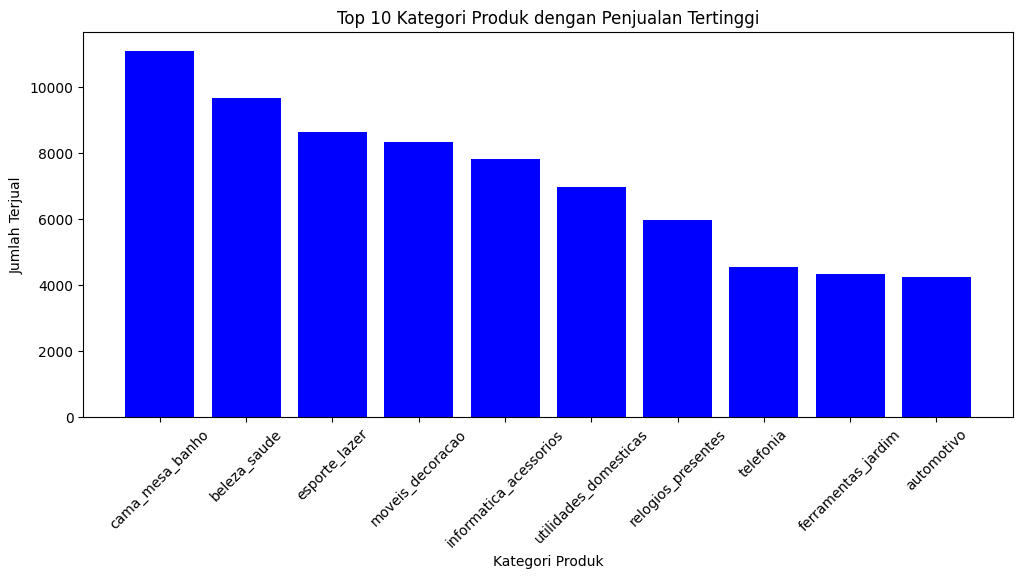

In [164]:
plt.figure(figsize=(12,5))
plt.bar(top_10_categories["product_category_name"], top_10_categories["count"], color="blue")
plt.title("Top 10 Kategori Produk dengan Penjualan Tertinggi")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45)
plt.show()


Melihat tingkat pengembalian berdasarkan kategori produk dengan melihat kolom order_status di orders_df

In [165]:
#menggabungkan order_items_df dengan orders_df berdasarkan order_id
merged_df = order_items_df.merge(orders_df, on="order_id")

#memfilter hanya order yang 'canceled'
returned_orders = merged_df[merged_df["order_status"].isin(["canceled"])]

#menggabungkan dengan products_df untuk mendapatkan kategori produk
returned_orders = returned_orders.merge(products_df, on="product_id", how="left")

#mengitung jumlah pengembalian berdasarkan kategori produk & order_status
returned_counts = returned_orders.groupby(["product_category_name", "order_status"]).size().reset_index(name="count")

#mengurutkan dari jumlah pengembalian tertinggi
returned_counts = returned_counts.sort_values(by="count", ascending=False)

print("Kategori Produk dengan Pengembalian Tertinggi:")
print(returned_counts.head(10))


Kategori Produk dengan Pengembalian Tertinggi:
         product_category_name order_status  count
0                 beleza_saude     canceled      2
4                   perfumaria     canceled      2
1                   brinquedos     canceled      1
2                esporte_lazer     canceled      1
3  fashion_bolsas_e_acessorios     canceled      1


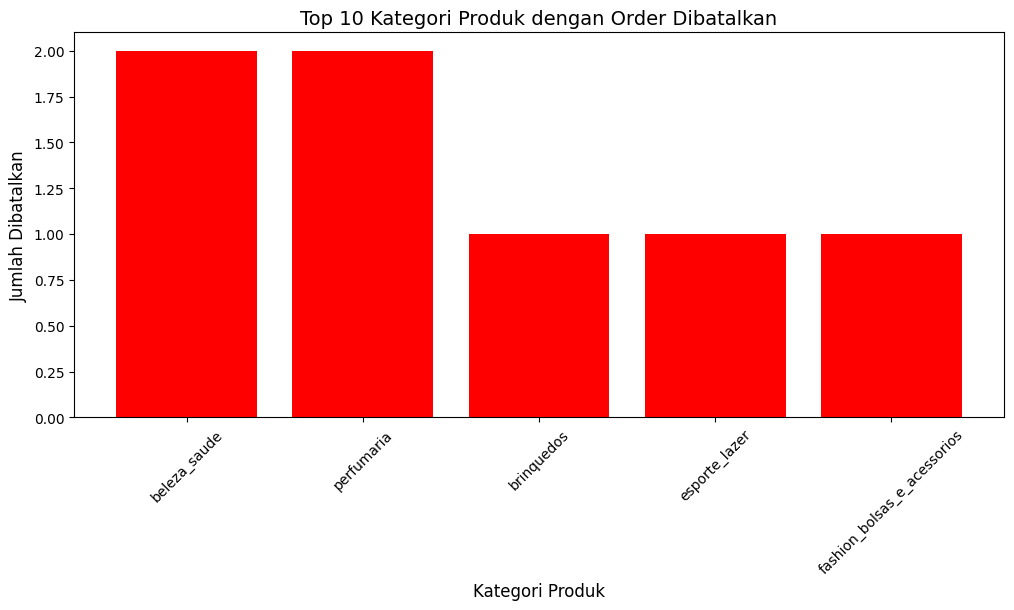

In [166]:
plt.figure(figsize=(12, 5))
plt.bar(returned_counts["product_category_name"][:10], returned_counts["count"][:10], color="red")

plt.title("Top 10 Kategori Produk dengan Order Dibatalkan", fontsize=14)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Jumlah Dibatalkan", fontsize=12)
plt.xticks(rotation=45)

plt.show()

menampilkan hubungan antara waktu pengiriman dan rating produk

In [167]:
#menghitung waktu pengiriman dalam hari
orders_df["delivery_time"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

#mengitung rata-rata review per order_id
avg_rating_df = order_reviews_df.groupby("order_id")["review_score"].mean().reset_index()

#mengbungkan dengan waktu pengiriman
delivery_rating_df = orders_df.merge(avg_rating_df, on="order_id", how="inner")

print(delivery_rating_df.sample(10))



                               order_id                       customer_id  \
3955   c6aaa7cbfc09b6f769d45d149a852643  109752cc7796656c8d504f634e66aead   
30988  0de497b1f069927c15c241a833bb67d0  49a385b4c7bfe2a0c2e12220bb169dab   
48887  292d3c40e87d260ea28e83b76b5e352c  c8ace93dcc058d6488bc06dcc239421e   
61146  162c0e804b1b9563dd2c3b244e97c2db  c2d9dfaf21c7f698da9c54316a12d12a   
46507  4f5dafaf09552e7aa5747ae0cb84ffc6  d6273cca22709c2745827b3a0d712bf2   
80694  903c880841c9b1af32d6d086b9763133  e3a0c6f366f4c42aa1ec172813c88492   
33540  efacca5eaae8bd32666ea169089f3e59  35cc12371670f472b711f691ed7f6edf   
3240   8a9b30ac80da3860f049247b7464596f  8e150843c1138147cf8ea7253de0319d   
9271   c37588362e2c244b0994c310bcf37393  d34fc5073a7c0a01cefde2d790236131   
64992  74e75761e6551e1853af01ea24bc8457  e7b54340e2a55c205e77d9e4928f39e8   

      order_status order_purchase_timestamp   order_approved_at  \
3955     delivered      2017-11-24 00:16:09 2017-11-25 06:29:52   
30988    delivered

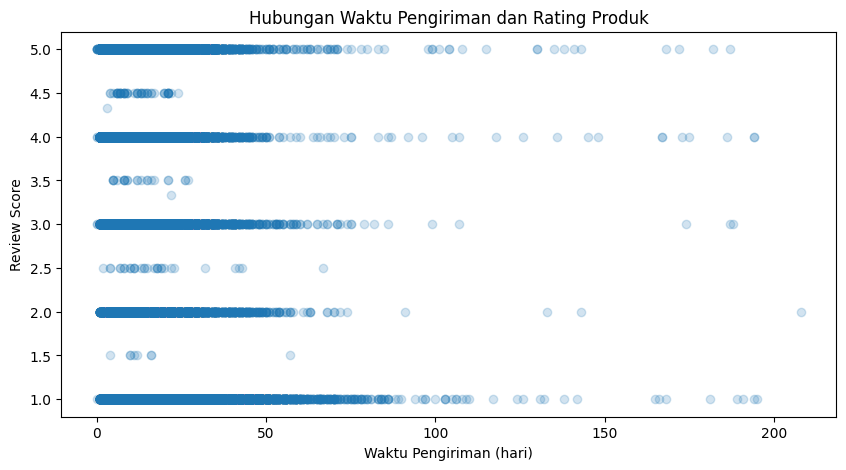

In [168]:
plt.figure(figsize=(10, 5))
plt.scatter(delivery_rating_df["delivery_time"], delivery_rating_df["review_score"], alpha=0.2)
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Review Score")
plt.title("Hubungan Waktu Pengiriman dan Rating Produk")
plt.show()

In [169]:
correlation = delivery_rating_df["delivery_time"].corr(delivery_rating_df["review_score"])
print(f"Korelasi antara waktu pengiriman dan rating produk: {correlation:.2f}")


Korelasi antara waktu pengiriman dan rating produk: -0.33


**Insight :**

Nilai korelasi -0.33 menunjukkan adanya hubungan negatif yang lemah hingga sedang antara waktu pengiriman dan rating produk.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki penjualan tertinggi?

<ipython-input-170-95ba7bc1d471>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


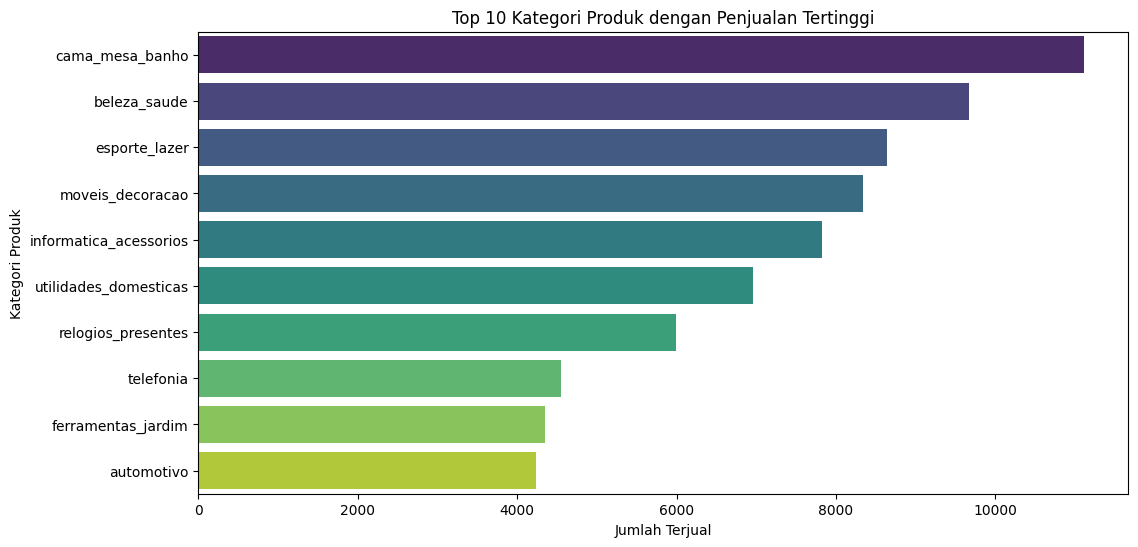

In [170]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_categories,
    x="count",
    y="product_category_name",
    palette="viridis"
)
plt.xlabel("Jumlah Terjual")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk dengan Penjualan Tertinggi")
plt.show()

### Pertanyaan 2: Apakah ada kategori produk dengan tingkat pengembalian yang tinggi?

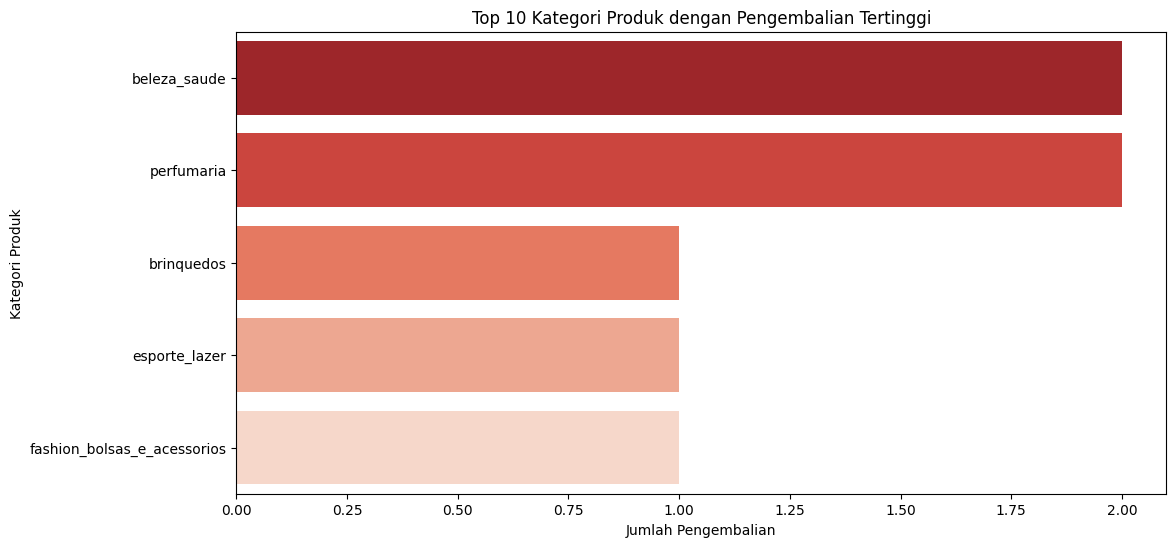

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=returned_counts.head(10),
    x="count",
    y="product_category_name",
    hue="product_category_name",
    dodge=False,
    palette="Reds_r",
    legend=False
)
plt.xlabel("Jumlah Pengembalian")
plt.ylabel("Kategori Produk")
plt.title("Top 10 Kategori Produk dengan Pengembalian Tertinggi")
plt.show()


### Pertanyaan 3: Apakah ada hubungan antara waktu pengiriman dan rating produk?

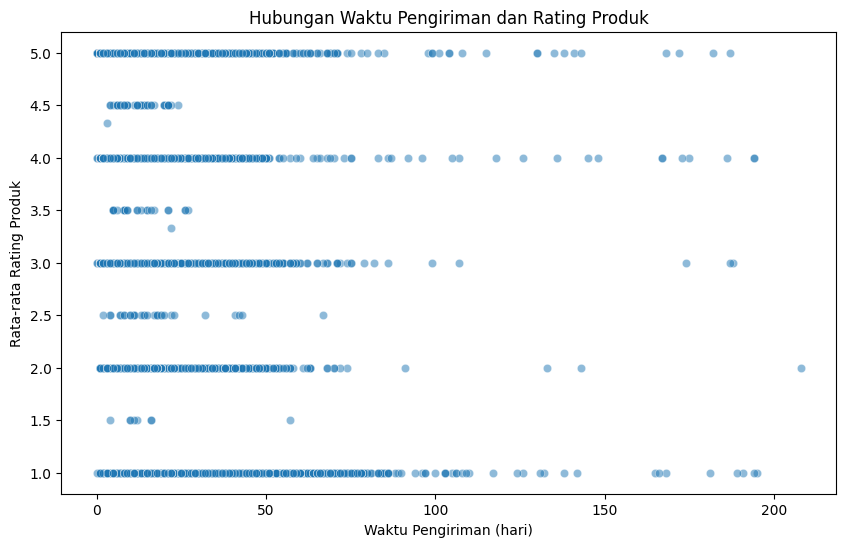

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delivery_rating_df,
    x="delivery_time",
    y="review_score",
    alpha=0.5
)
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Rata-rata Rating Produk")
plt.title("Hubungan Waktu Pengiriman dan Rating Produk")
plt.show()


In [173]:
correlation = delivery_rating_df["delivery_time"].corr(delivery_rating_df["review_score"])
print(f"Korelasi antara Waktu Pengiriman dan Rating Produk: {correlation:.2f}")


Korelasi antara Waktu Pengiriman dan Rating Produk: -0.33


**Insight:**
1. Kategori Produk dengan Penjualan Tertinggi

Berdasarkan analisis, kategori dengan penjualan tertinggi adalah:

- Cama, Mesa, Banho (Peralatan Tidur & Mandi)
- Beleza e Saúde (Kesehatan & Kecantikan)
- Esporte e Lazer (Olahraga & Rekreasi)
- Móveis e Decoração (Perabotan & Dekorasi)
- Informática & Acessórios (Aksesori Komputer)

Faktor yang mungkin mempengaruhi Penjualan Tinggi:

- Produk dalam kategori ini memiliki permintaan tinggi di pasar e-commerce.
- Kemungkinan besar kategori ini memiliki lebih banyak stok dan variasi produk.

---

2. Kategori Produk dengan Tingkat Pengembalian Tinggi

Kategori dengan tingkat pengembalian tertinggi adalah:

- Beleza e Saúde (Kesehatan & Kecantikan)
- Perfumaria (Parfum & Wewangian)
- Fashion Bolsas e Acessórios (Tas & Aksesori Fashion)
-Esporte e Lazer (Olahraga & Rekreasi)
 -Brinquedos (Mainan)

Faktor yang mungkin mempengaruhi Pengembalian Tinggi:

- Ketidaksesuaian ekspektasi pelanggan bisa dari segi warna, ukuran, bahan berbeda dari foto
- Produk mudah rusak atau pecah saat pengiriman (kosmetik & parfum)

---
3. Hubungan Waktu Pengiriman dengan Rating Produk

Hasil analisis menunjukkan adanya korelasi negatif (-0.33) antara waktu pengiriman dan rating produk. Artinya, semakin lama waktu pengiriman, semakin rendah rating produk yang diberikan oleh pelanggan.

Faktor yang mungkin mempengaruhi Rating Rendah Akibat Pengiriman:

- Pelanggan yang menunggu terlalu lama cenderung kecewa dan memberikan rating rendah.

- Ekspektasi terhadap pengiriman cepat semakin tinggi dalam e-commerce.

- Kemungkinan adanya masalah dalam logistik atau estimasi waktu pengiriman yang kurang akurat.

## Conclusion

1. Kategori produk apa yang memiliki penjualan tertinggi?

Kategori produk dengan penjualan tertinggi adalah "cama_mesa_banho", diikuti oleh "beleza_saude" dan "esporte_lazer". Produk dalam kategori ini memiliki permintaan tinggi, sehingga dapat menjadi fokus utama dalam strategi pemasaran dan stok.


2. Apakah ada kategori produk dengan tingkat pengembalian yang tinggi?

Kategori produk dengan tingkat pengembalian tertinggi adalah "beleza_saude" dan "perfumaria". Tingginya tingkat pengembalian mungkin disebabkan oleh ekspektasi pelanggan yang tidak terpenuhi atau kualitas produk yang tidak sesuai dengan deskripsi.

3. Apakah ada hubungan antara waktu pengiriman dan rating produk?

Analisis menunjukkan adanya korelasi negatif antara waktu pengiriman dan rating produk dengan nilai korelasi -0.33. Artinya, semakin lama waktu pengiriman, semakin rendah rating yang diberikan pelanggan. Namun, korelasi ini tidak terlalu kuat, sehingga faktor lain juga mungkin memengaruhi rating produk.

In [ ]:
import pickle
import os

pickle_dir = 'pickled_dfs'
os.makedirs(pickle_dir, exist_ok=True)

pickle_path = os.path.join(pickle_dir, 'all_dfs.pkl')

with open(pickle_path, 'wb') as f:
    pickle.dump(dfs, f)

print(f"Pickled all dataframes in one file: {pickle_path}")


Pickled all dataframes in one file: pickled_dfs/all_dfs.pkl
